# Importer les bibliothèques nécessaires

In [91]:
import pandas as pd
import numpy as np
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # Appliquer le style 'ggplot' à Matplotlib

# PARTIE I : CHARGEMENT ET PREPARATION DES DONNEES

## 1. Chargement et aperçu des donnees

### 1.1. Charger les donnees

In [92]:
df = pd.read_csv("D:/INSSEDS/datasets/delai_livraison.csv")

### 1.2. Visualiser les premieres lignes du DataFrame pour inspection

In [93]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### 1.3. Infos

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [95]:
# Changer le type de la colonne 'Order_ID' en chaîne de caractères
df['Order_ID'] = df['Order_ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


## 2. Traitement des valeurs manquantes

### 2.1. Visualisation des valeurs manquantes

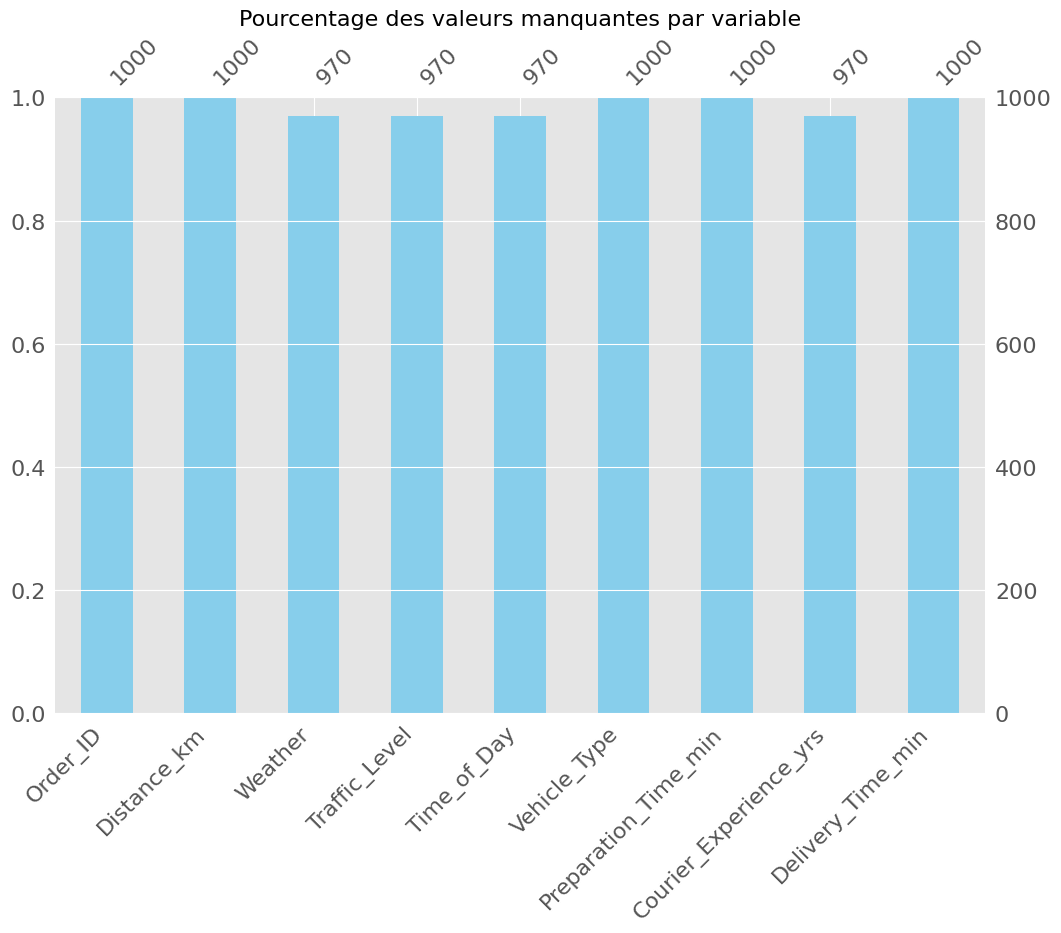

In [96]:
# Visualiser le pourcentage de valeurs manquantes pour chaque colonne
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage des valeurs manquantes par variable', fontsize=16)

# Afficher le graphique
plt.show()

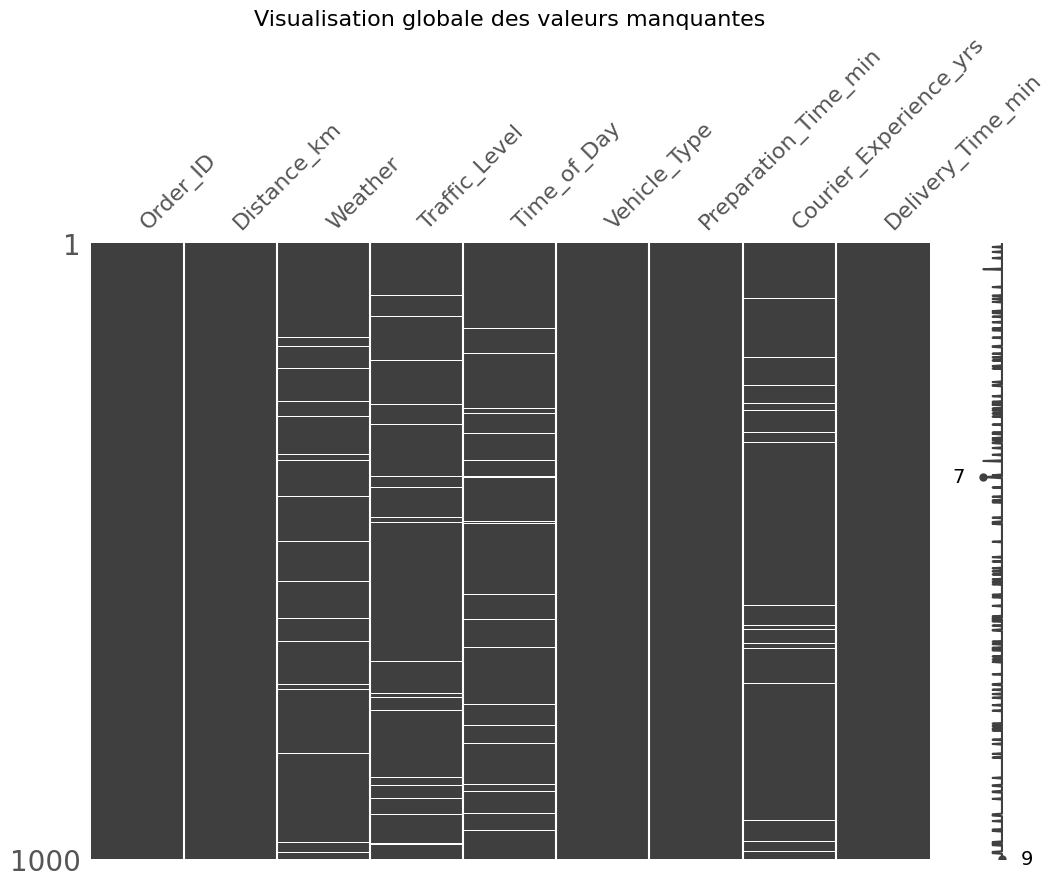

In [97]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs manquantes', fontsize=16)

# Afficher le graphique
plt.show()

### 2.2. Imputation des variables manquantes

In [98]:
# Imputation des colonnes numériques avec la valeur médiane
numeric_columns = ["Courier_Experience_yrs"]
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Imputation des colonnes catégoriques avec la valeur modale
categorical_columns = ["Weather", "Traffic_Level", "Time_of_Day"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des valeurs manquantes restantes
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

### 2.3. Visualisation des valeurs manquantes traitées

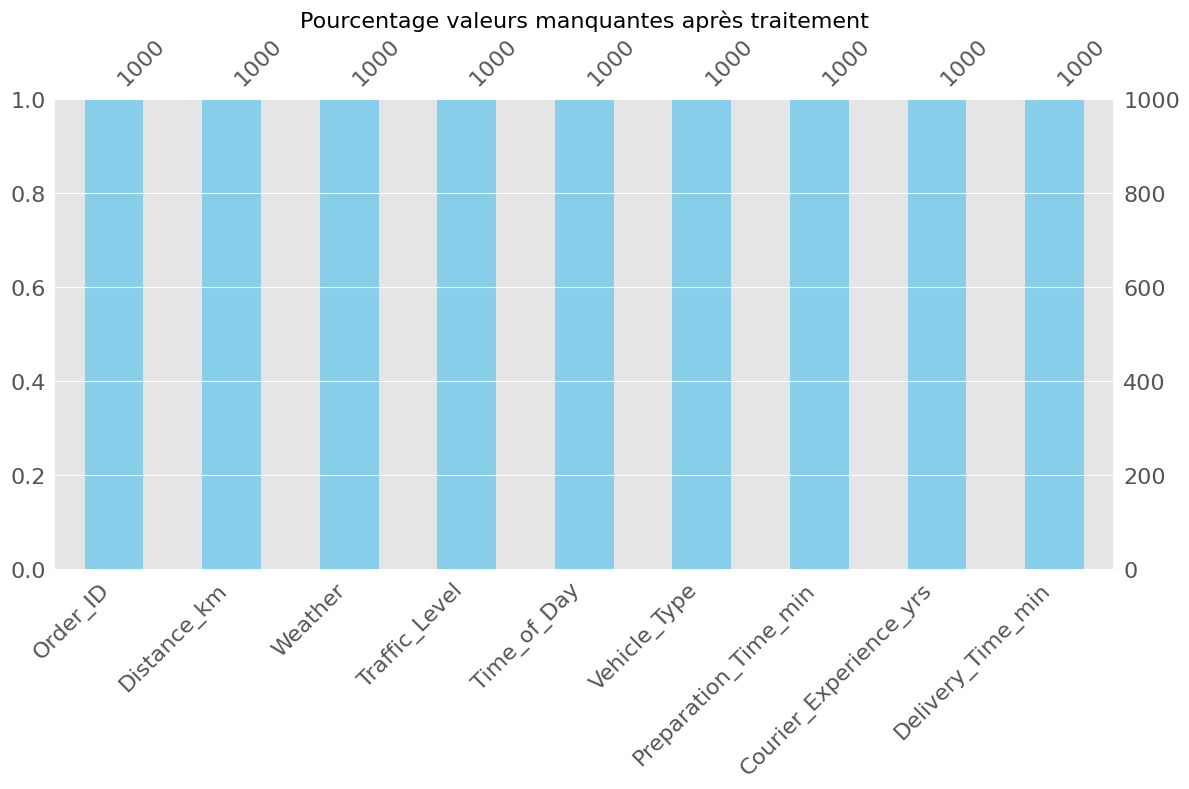

In [99]:
# Visualiser des valeurs manquantes traitées
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage valeurs manquantes après traitement', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()


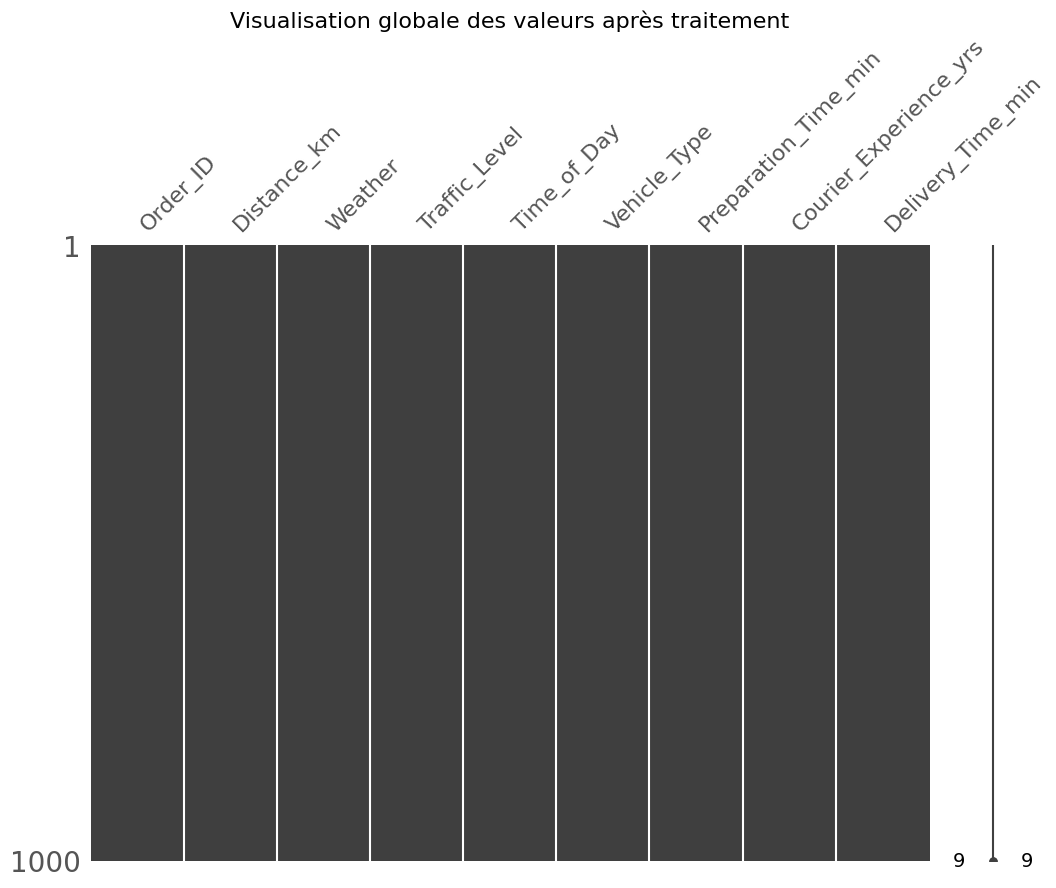

In [100]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs après traitement', fontsize=16)

# Afficher le graphique
plt.show()

## 3. Traitement des valeurs  abberantes et/ ou extremes

In [101]:
# Sélectionner les colonnes numériques
X_numeric = df.select_dtypes(include=['number'])
# Définir y comme étant la colonne cible
y = df['Delivery_Time_min']
# Inclure la cible dans le DataFrame utilisé pour la corrélation
X_numeric_with_target = X_numeric.copy()
X_numeric_with_target['Delivery_Time_min'] = y

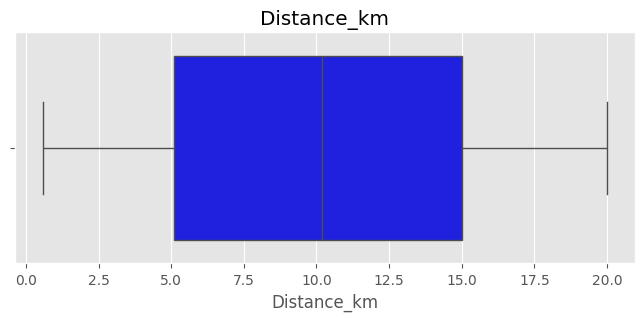

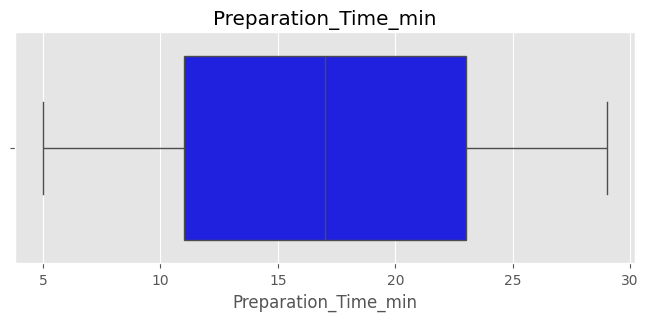

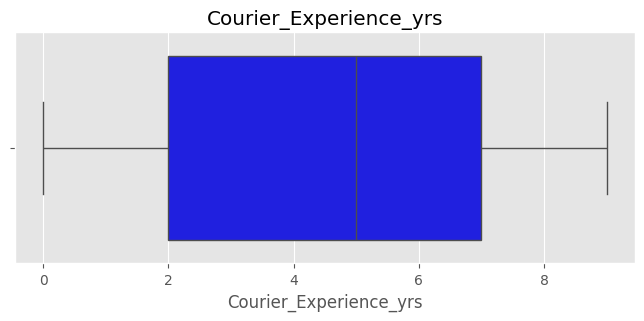

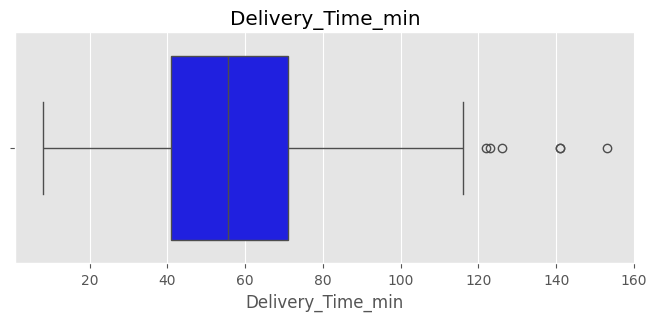

In [102]:
# Detection des valeurs abberantes et/ ou extremes
for column in X_numeric_with_target.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=X_numeric_with_target[column], ax=ax, color="blue")
    plt.title(column)
    plt.show()

In [103]:
# Winsorisation des valeurs extrêmes (utilisation de `scipy.stats.mstats.winsorize`)
from scipy.stats.mstats import winsorize

df['Delivery_Time_min'] = winsorize(df['Delivery_Time_min'], limits=[0.05, 0.05])

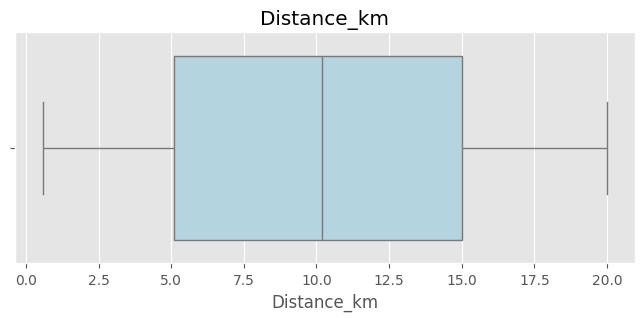

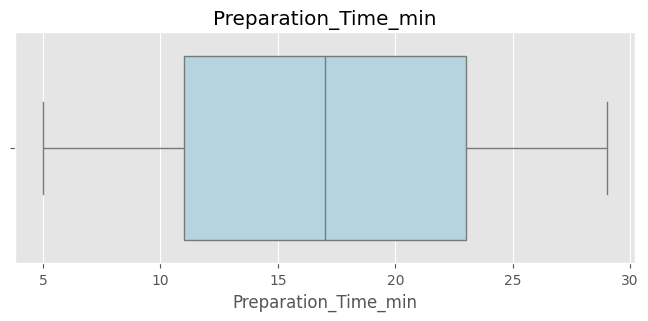

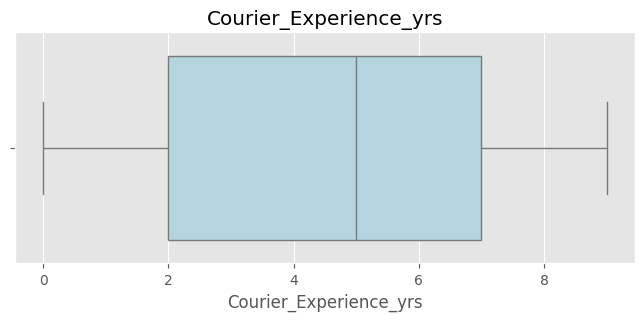

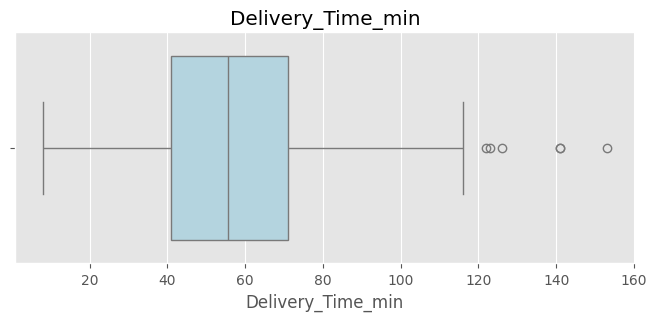

In [104]:
# Visualtions des boxplots après traitement
for column in X_numeric_with_target.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=X_numeric_with_target[column], ax=ax, color="lightblue")
    plt.title(column)
    plt.show()

In [105]:
#y = df['Delivery_Time_min']  # Variable cible : Délai de livraison
#X = df.drop(columns=['Order_ID', 'Delivery_Time_min'])  # Retirer la colonne cible et l'ID de commande

# PARTIE II : REG LINEAIRE

## 1. Explorer les relations entre les variables

### 1.1. Calcul et visualisation de la corrélation entre chaque variable et la variable cible

In [106]:
# Calcul de la matrice de corrélation
correlation_matrix = X_numeric.corr()
correlation_matrix

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007534,0.780998
Preparation_Time_min,-0.009037,1.000000,-0.030842,0.307350
Courier_Experience_yrs,-0.007534,-0.030842,1.000000,-0.089111
Delivery_Time_min,0.780998,0.307350,-0.089111,1.000000


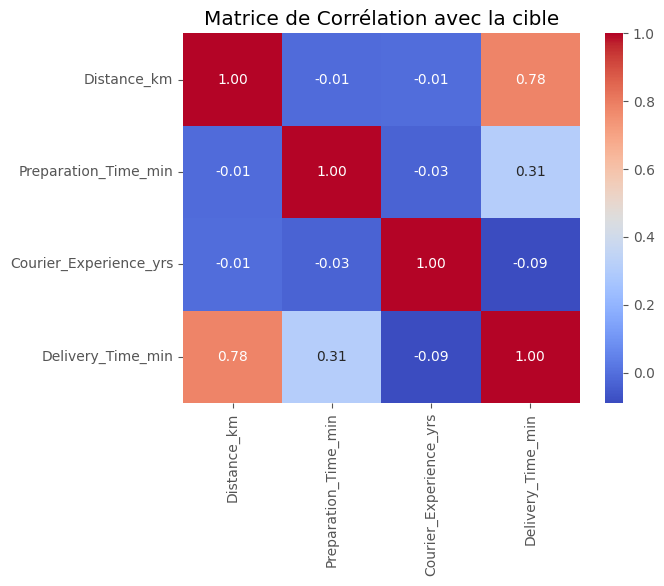

In [107]:
# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation avec la cible')
plt.show()

### 1.2. Sélectionner les variables les plus explicatives

In [108]:
import statsmodels.api as sm
X_const = sm.add_constant(X_numeric)  # Ajoute une constante pour le modèle
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner uniquement les colonnes numériques
X_const_numeric = X_const.select_dtypes(include=['number'])


correlations = X_const_numeric.corrwith(y)
correlations

c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


const                          NaN
Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.089111
Delivery_Time_min         1.000000
dtype: float64

In [109]:
# Sélectionner les variables avec une corrélation absolue supérieure à un seuil
threshold_corr = 0.3  # Retenons cette valeur comme seuil de corrélation
selected_variables = correlations[correlations.abs() > threshold_corr].index.tolist()

# Exclure la variable cible 'Delivery_Time_min' de 'correlations'
selected_variables = [var for var in selected_variables if var != 'Delivery_Time_min']

print("Variables sélectionnées sans la cible :", selected_variables)

Variables sélectionnées sans la cible : ['Distance_km', 'Preparation_Time_min']


## 2. Construction du modèle de régression linéaire

### 2.1. Partitionnement des données en ensemble d'entraînement et de test

In [110]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des variables et préparation des données
X_selected = X_numeric[selected_variables]  # Variables sélectionnées
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2.2. Le modèle de régression linéaire

In [111]:
# Créer et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [112]:
# Afficher les coefficients du modèle
print("\nCoefficients du modèle de régression linéaire :")
coefficients = pd.DataFrame(linear_model.coef_, index=X_selected.columns, columns=["Coefficient"])
coefficients


Coefficients du modèle de régression linéaire :


,Coefficient
Distance_km,17.379925
Preparation_Time_min,7.122285


In [113]:
# Faire des prédictions sur l'ensemble de test
y_pred = linear_model.predict(X_test_scaled)

In [114]:
# Évaluer le modèle sur l'ensemble de test
r_squared = linear_model.score(X_test_scaled, y_test)
print(f"\nScore du modèle (R²) sur l'ensemble de test : {r_squared:.4f}")


Score du modèle (R²) sur l'ensemble de test : 0.7313


### 2.3 Calculer les métriques de performance

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 5. Calcul des métriques de performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 6. Affichage des résultats
print(f"R² : {r2:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"MAE (Mean Absolute Error) : {mae:.4f}")
print(f"MSE (Mean Squared Error) : {mse:.4f}")


R² : 0.7313
RMSE (Root Mean Squared Error) : 10.9744
MAE (Mean Absolute Error) : 7.6804
MSE (Mean Squared Error) : 120.4375


In [116]:
import statsmodels.api as sm

# Ajouter une constante pour le terme d'interception
X_train_with_const = sm.add_constant(X_train_scaled)

# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(y_train, X_train_with_const).fit()

# Afficher le résumé du modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     944.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          4.96e-211
Time:                        19:03:20   Log-Likelihood:                -3131.5
No. Observations:                 800   AIC:                             6269.
Df Residuals:                     797   BIC:                             6283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0538      0.430    132.820      0.0

##Prédiction 

In [117]:
from sklearn.linear_model import LinearRegression

# Assurez-vous que votre modèle a été ajusté avec X_train et y_train
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédire  avec de nouvelles données : 
 # La distance de 10 km,
 # Le temps de préparation  est de 15 min.
nouvelle_donnee = np.array([[10, 15]])

# Faire la prédiction
predicted_value = model.predict(nouvelle_donnee)

# Afficher la prédiction
print("Temps de livraison prédit : ", predicted_value[0])


Temps de livraison prédit :  337.68726663496574


## 3. Vérification des hypothèses du modèles

### Dispersion entre les valeurs réelles et les prédictions

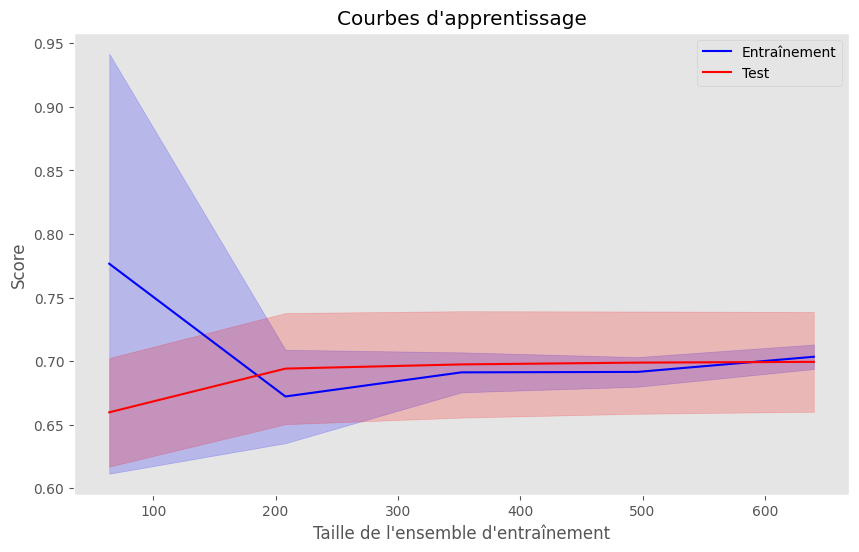

In [118]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Calcul de la moyenne et de l'écart type des scores de test et d'entraînement
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entraînement', color='blue')
plt.plot(train_sizes, test_mean, label='Test', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbes d\'apprentissage')
plt.legend()
plt.grid()
plt.show()


In [119]:
from sklearn.metrics import mean_squared_error

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des erreurs quadratiques moyennes
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Affichage des résultats
print(f"Erreur MSE sur l'ensemble d'entraînement: {train_mse}")
print(f"Erreur MSE sur l'ensemble de test: {test_mse}")

# Si l'erreur sur l'ensemble de test est beaucoup plus élevée que sur l'entraînement, cela peut indiquer un surapprentissage.


Erreur MSE sur l'ensemble d'entraînement: 97067.29352152772
Erreur MSE sur l'ensemble de test: 93711.34728176036


c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


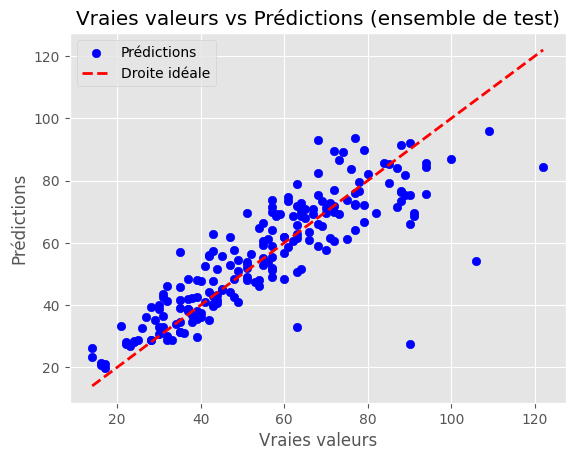

In [120]:
import matplotlib.pyplot as plt

# Tracer les vraies valeurs vs les prédictions sur l'ensemble de test
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Droite idéale')

# Ajouter des labels et un titre
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Vraies valeurs vs Prédictions (ensemble de test)')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


### 3.3. Vérification de la normalité : normalité des erreurs

In [121]:
y_pred = linear_model.predict(X_test_scaled)
print(f"Shape de y_pred après prédiction: {y_pred.shape}")


Shape de y_pred après prédiction: (200,)


In [122]:
# Calcul des résidus
residuals = y_test - y_pred
residuals

521   -9.404803
737    2.048655
740    3.394202
660    0.690064
411   -0.179003
         ...   
408   -1.651269
332   -0.802433
208    3.372909
613    0.092008
78     5.281282
Name: Delivery_Time_min, Length: 200, dtype: float64

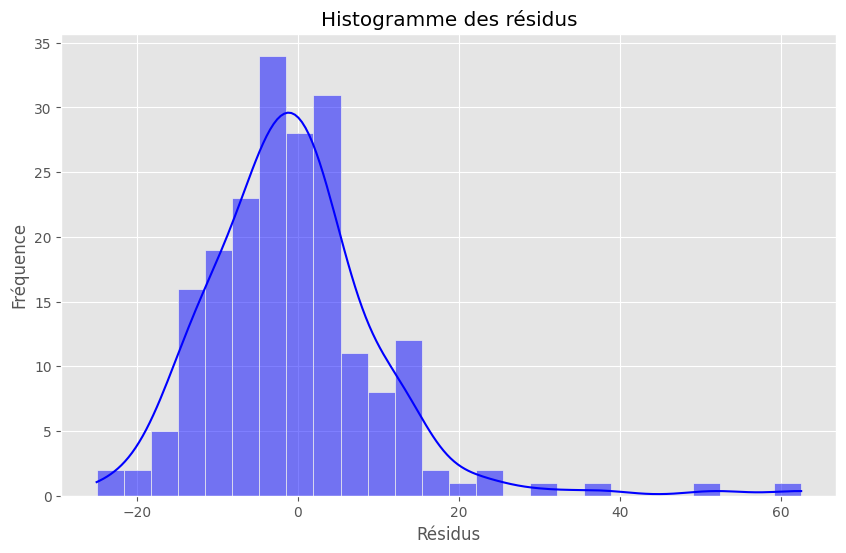

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


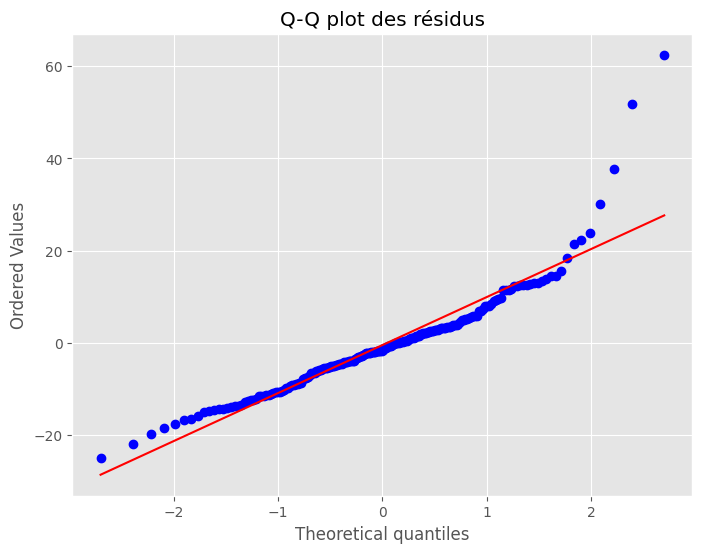

In [124]:
# Q-Q plot pour tester la normalité des résidus
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot des résidus')
plt.show()

In [125]:
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
data_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(data_normality)

    Test de normalité  Statistique p-value
0        Shapiro-Wilk     0.890184     0.0
1    Anderson-Darling     3.054374     N/A
2  Kolmogorov-Smirnov     0.456307     0.0


### 3.1. Linéarité

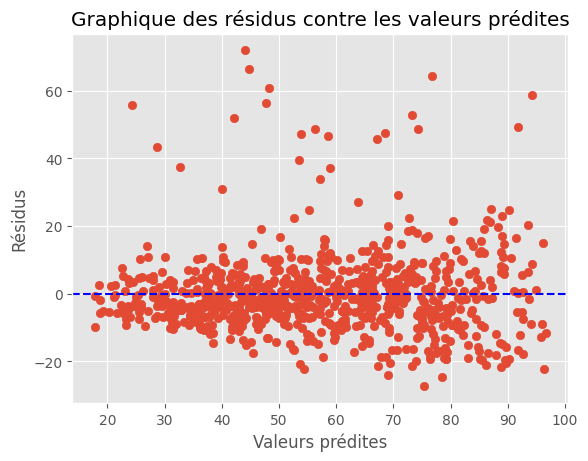

In [126]:
# Tracez les résidus contre les valeurs prédites pour vérifier la linéarité.
y_pred = linear_model.predict(X_train_scaled)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus contre les valeurs prédites')
plt.show()

### 3.2 Vérification de l'autocorrélation : indépendance des erreurs (Durbin-Watson)

In [127]:
from statsmodels.stats.stattools import durbin_watson

# Calcul de la statistique de Durbin-Watson sur les résidus
dw_stat = durbin_watson(residuals)

print(f"Statistique de Durbin-Watson : {dw_stat}")


Statistique de Durbin-Watson : 2.0075472540721138


**Conclusion :**
Le modèle satisfait le critère d'absence d'autocorrélation (la statistique ≈ 2), ce qui renforce la fiabilité des estimations des coefficients. Vous pouvez donc interpréter les résultats avec confiance.

### Moyenne des termes d'erreur

In [128]:
residuals.mean()

-1.6786572132332366e-15

**Conclusion :**
Une moyenne des résidus proche de zéro est généralement un bon signe que le modèle n'est pas biaisé. Dans votre Bien que la moyenne des résidus soit légèrement négative, elle n'est pas suffisamment importante pour suggérer un problème majeur de biais dans le modèle.

### Multicolinéarité (Variance Inflation Factor - VIF)

In [129]:
# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_numeric.values, i) for i in range(X_const_numeric.shape[1])]
# Afficher les résultats
print(vif_data)

                 Variable        VIF
0                   const  13.742161
1             Distance_km   3.146970
2    Preparation_Time_min   1.342019
3  Courier_Experience_yrs   1.019960
4       Delivery_Time_min   3.499288


### Validation croisée

In [130]:
from sklearn.model_selection import cross_val_score

# Effectuer la validation croisée (par exemple, 5 folds)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Afficher les scores R² pour chaque fold
print(f"Scores R² pour chaque fold : {cv_scores}")

# Calculer et afficher la moyenne des scores R²
mean_r2 = np.mean(cv_scores)
print(f"Score R² moyen sur les 5 folds : {mean_r2:.4f}")

Scores R² pour chaque fold : [0.7381225  0.63387331 0.71885615 0.67577168 0.73060426]
Score R² moyen sur les 5 folds : 0.6994


# PARTIE III : ANOVA

## 1. Graphe des délais de livraison selon la météo

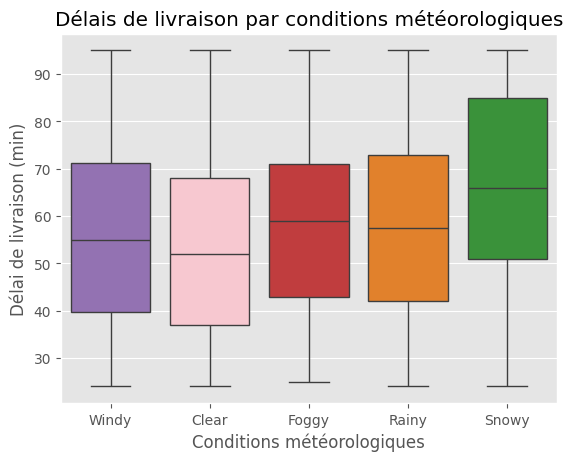

In [131]:
# Palette personnalisée pour le boxplot
palette = {
    'Sunny': '#1f77b4',   # Bleu
    'Rainy': '#ff7f0e',  # Orange
    'Snowy': '#2ca02c',   # Vert
    'Foggy': '#d62728',   # Rouge
    'Windy': '#9467bd',    # Violet
    'Clear':  'pink'    # Rose
}

sns.boxplot(x='Weather', y='Delivery_Time_min', hue='Weather', data=df, palette=palette, dodge=False)
plt.title('Délais de livraison par conditions météorologiques')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Délai de livraison (min)')
plt.show()


## 2. Vérification des hypothèses

### 2.1. Normalité des résidus

In [132]:
weather_groups = [group['Delivery_Time_min'].values for name, group in df.groupby('Weather')]
stat, p_normal = stats.shapiro(df['Delivery_Time_min'])
print(f"Test de normalité (Shapiro-Wilk) : Stat={stat:.4f}, p-value={p_normal:.4f}")

Test de normalité (Shapiro-Wilk) : Stat=0.9652, p-value=0.0000


1. **Statistique** : 0.9652

2. **p-valeur** : 0.0000 (inférieure à 0.05)


   **Conclusion** :
La p-valeur indique que la distribution des résidus ne suit pas une loi normale.

   Cela viole l'une des hypothèses de base de l'ANOVA (normalité des résidus).

### 2.2. Homogénéité des variances

In [133]:
stat, p_var = stats.levene(*weather_groups)
print(f"Test d'homogénéité des variances (Levene) : Stat={stat:.4f}, p-value={p_var:.4f}")

Test d'homogénéité des variances (Levene) : Stat=0.3675, p-value=0.8318


1. **Statistique** : 0.3675

2. **p-valeur** : 0.8318 (supérieure à 0.05)

   **Conclusion** :
La p-valeur indique que les variances des délais de livraison entre les groupes de conditions météorologiques sont homogènes. 
   L'hypothèse d'homogénéité des variances (homoscédasticité) est satisfaite.

## 3. Modèle ANOVA

In [134]:
from statsmodels.formula.api import ols
model = ols('Delivery_Time_min ~ C(Weather)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTable ANOVA :")
print(anova_table)

# Interprétation
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("\nConclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.")
else:
    print("\nConclusion : Aucune différence significative dans les délais de livraison entre les conditions météorologiques.")


Table ANOVA :
                   sum_sq     df          F        PR(>F)
C(Weather)   16809.428096    4.0  10.763818  1.522111e-08
Residual    388463.015904  995.0        NaN           NaN

Conclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.


**p-valeur de 1.522e-08** : Cette valeur est très faible, ce qui suggère une différence significative entre les groupes de conditions météorologiques.
Cependant, la violation de l'hypothèse de normalité peut rendre les résultats de l'ANOVA moins fiables.

In [135]:
from scipy.stats import kruskal

# Test de Kruskal-Wallis
stat, p_value = kruskal(*[df['Delivery_Time_min'][df['Weather'] == condition] for condition in df['Weather'].unique()])

print(f"Statistique de Kruskal-Wallis: {stat:.4f}, p-valeur: {p_value:.4f}")

# Conclusion basée sur la p-valeur
if p_value < 0.05:
    print("Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).")
else:
    print("Aucune différence significative dans les délais de livraison entre les conditions météorologiques (test de Kruskal-Wallis).")


Statistique de Kruskal-Wallis: 37.1068, p-valeur: 0.0000
Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).


1. **Statistique** : 37.1068

2. **p-valeur** : 0.0000 (inférieure à 0.05)

   **Conclusion** :
La p-valeur très faible indique que les délais de livraison ne sont pas distribués de manière identique entre les groupes de conditions météorologiques. 

   Cela valide l'hypothèse selon laquelle la météo influence les délais de livraison.